In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report,confusion_matrix

from sklearn.metrics import auc,roc_curve
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler,StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

### PROBLEM STATEMENT

In [2]:
model_details=[]
training_accuracy=[]
testing_accuracy=[]

In [3]:
df =pd.read_csv("diabetes.csv")
df


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


### EXPLORATORY DATA ANALYSIS

In [4]:
df.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [5]:
df.describe()    ## statistical analysis

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isna().sum()     ## checking missing values

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df["Outcome"].value_counts()    ## checking our data is balance or not

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

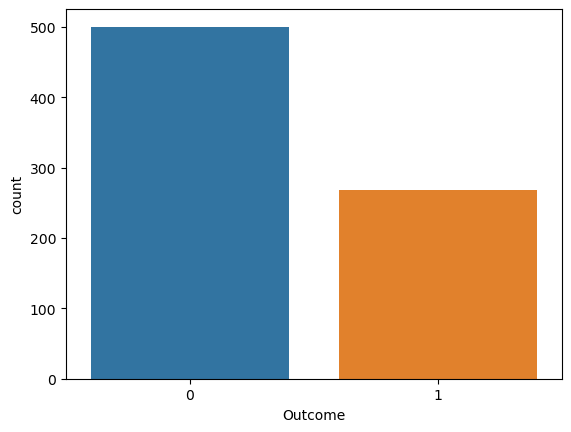

In [8]:
sns.countplot(df["Outcome"])     ## we need to balanced our data

<AxesSubplot:>

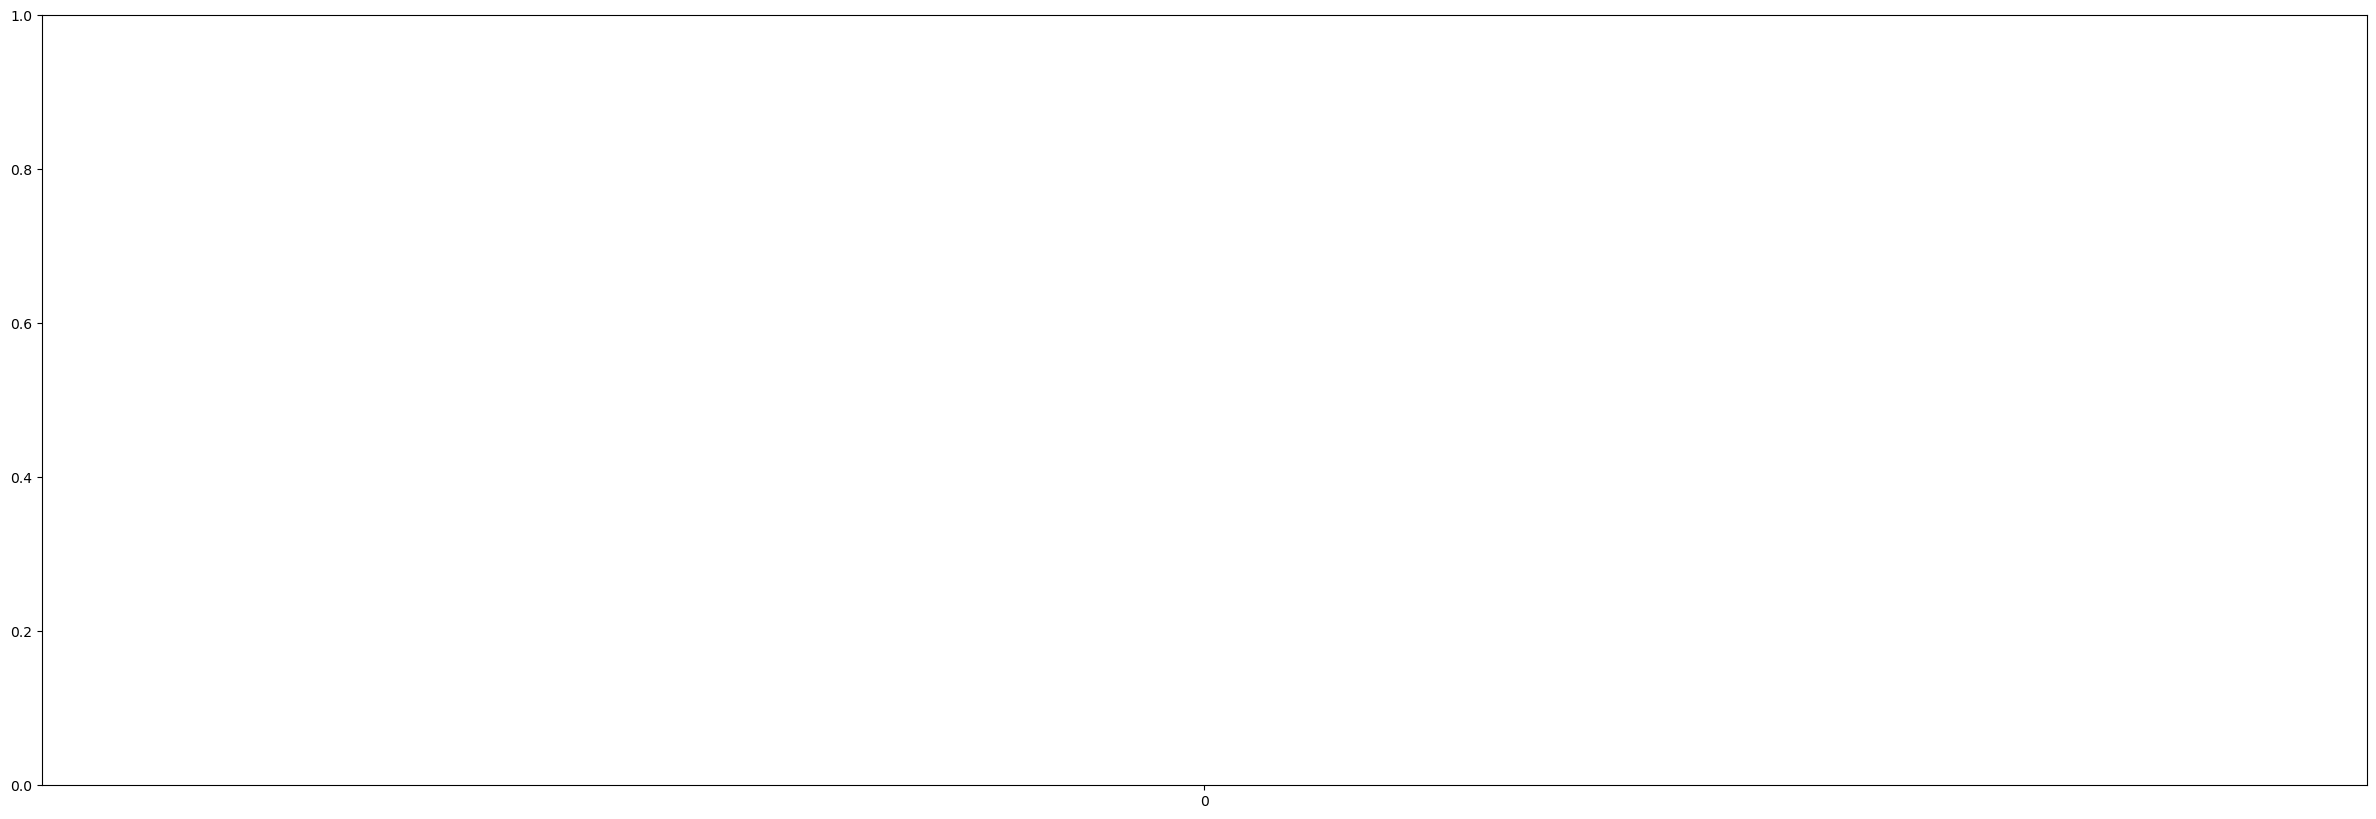

In [9]:
plt.figure(figsize = (30,10))   ## checking outliers
sns.boxplot()

### FEATURE ENGINEERING

In [10]:
##sampling

In [11]:
x = df.drop("Outcome",axis = 1)
y = df["Outcome"]

In [12]:
smt = SMOTE(k_neighbors=5, sampling_strategy=0.6) 
x_sample, y_sample = smt.fit_resample(x,y)
y_sample.value_counts()

0    500
1    300
Name: Outcome, dtype: int64

In [13]:
##scalling

In [14]:
## standard scaler

In [15]:
std_scalar = StandardScaler()

array = std_scalar.fit_transform(x_sample)

x = pd.DataFrame(array, columns = x_sample.columns)
y = y_sample

### MODEL BUILDING

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11,stratify=y)

logistic_model = LogisticRegression()
logistic_model.fit(x_train , y_train)
model_details.append("std_scaler_logistic_model")

accuracy--> 0.778125
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       442
           1       0.62      0.75      0.68       198

    accuracy                           0.78       640
   macro avg       0.75      0.77      0.75       640
weighted avg       0.80      0.78      0.78       640

*****************************************************************


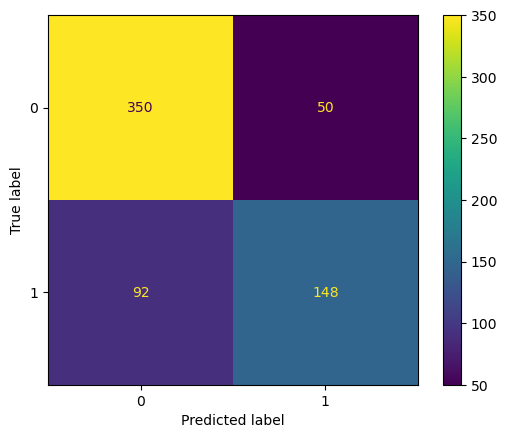

In [17]:
y_pred = logistic_model.predict(x_train)

accuracy = accuracy_score(y_pred , y_train)

plot_confusion_matrix(logistic_model,x_train , y_train)

clf_r = classification_report(y_pred , y_train)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)

accuracy--> 0.7375
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       114
           1       0.53      0.70      0.60        46

    accuracy                           0.74       160
   macro avg       0.70      0.73      0.70       160
weighted avg       0.77      0.74      0.75       160

*****************************************************************


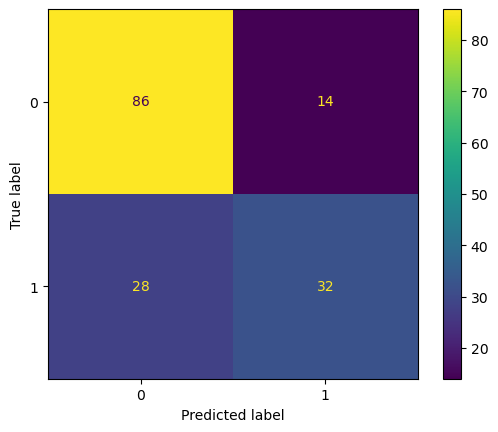

In [18]:
y_pred = logistic_model.predict(x_test)

accuracy = accuracy_score(y_pred , y_test)

plot_confusion_matrix(logistic_model,x_test , y_test)

clf_r = classification_report(y_pred , y_test)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)

In [19]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
model_details.append("std_scaler_knn_model")

accuracy--> 0.834375
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       400
           1       0.79      0.76      0.77       240

    accuracy                           0.83       640
   macro avg       0.82      0.82      0.82       640
weighted avg       0.83      0.83      0.83       640

*****************************************************************


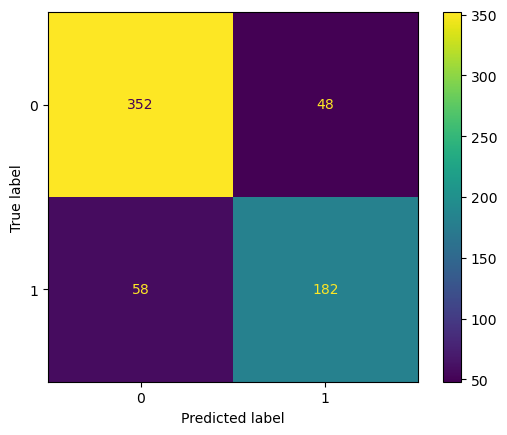

In [20]:
y_pred = knn_clf.predict(x_train)

plot_confusion_matrix(knn_clf,x_train,y_train)

accuracy = accuracy_score(y_train, y_pred)

clf_r = classification_report(y_train, y_pred)

print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)


accuracy--> 0.7875
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.81      0.84      0.83        96
           1       0.75      0.70      0.73        64

    accuracy                           0.79       160
   macro avg       0.78      0.77      0.78       160
weighted avg       0.79      0.79      0.79       160

*****************************************************************


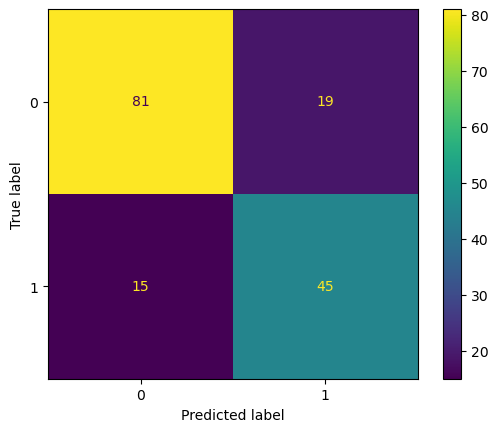

In [21]:
y_pred = knn_clf.predict(x_test)

accuracy = accuracy_score(y_pred , y_test)

plot_confusion_matrix(knn_clf,x_test , y_test)

clf_r = classification_report(y_pred , y_test)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)


In [22]:
knn_clf = KNeighborsClassifier()
param_grid = {"n_neighbors":np.arange(3,30),
             "p":[1,2]}

gscv_knn_clf = GridSearchCV(knn_clf,param_grid, cv=5)
gscv_knn_clf.fit(x_train,y_train)
knn_clf = gscv_knn_clf.best_estimator_
knn_clf.fit(x_train,y_train)
model_details.append("std_scaler_hyperparameter_tunning_noramal_model")

accuracy--> 0.8171875
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       400
           1       0.77      0.73      0.75       240

    accuracy                           0.82       640
   macro avg       0.81      0.80      0.80       640
weighted avg       0.82      0.82      0.82       640

*****************************************************************


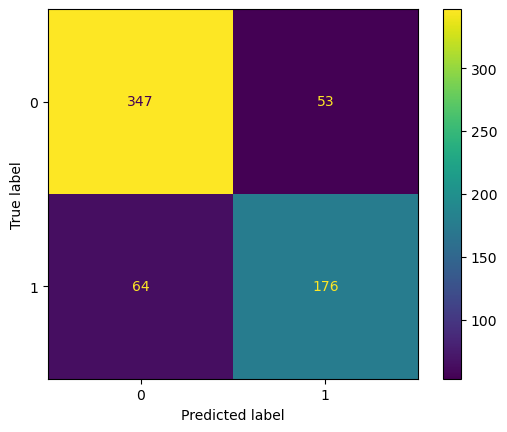

In [23]:
y_pred = knn_clf.predict(x_train)

plot_confusion_matrix(knn_clf,x_train,y_train)

accuracy = accuracy_score(y_train, y_pred)

clf_r = classification_report(y_train, y_pred)

print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)


accuracy--> 0.7625
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       100
           1       0.68      0.68      0.68        60

    accuracy                           0.76       160
   macro avg       0.75      0.75      0.75       160
weighted avg       0.76      0.76      0.76       160

*****************************************************************


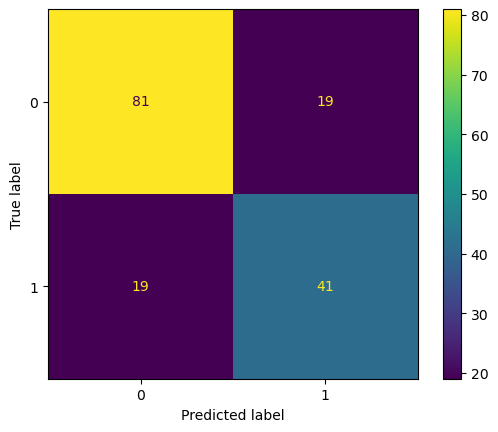

In [24]:
y_pred = knn_clf.predict(x_test)

plot_confusion_matrix(knn_clf,x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)

clf_r = classification_report(y_test, y_pred)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)


In [25]:
dt_model = DecisionTreeClassifier( random_state = 44)
dt_model.fit(x_train , y_train)
model_details.append("std_scaler_DecisionTree")

accuracy--> 1.0
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       240

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640

*****************************************************************


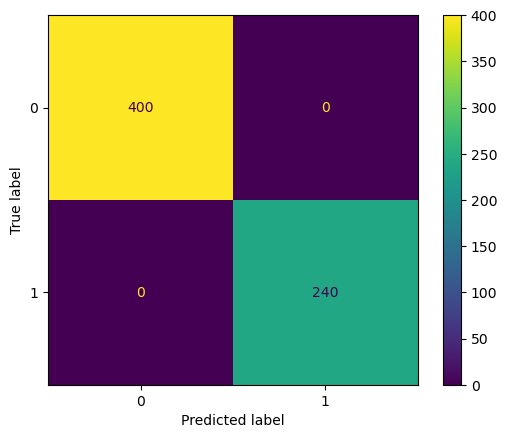

In [26]:
y_pred = dt_model.predict(x_train)

plot_confusion_matrix(dt_model,x_train,y_train)

accuracy = accuracy_score(y_train, y_pred)

clf_r = classification_report(y_train, y_pred)

print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)


accuracy--> 0.74375
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       100
           1       0.65      0.70      0.67        60

    accuracy                           0.74       160
   macro avg       0.73      0.73      0.73       160
weighted avg       0.75      0.74      0.75       160

*****************************************************************


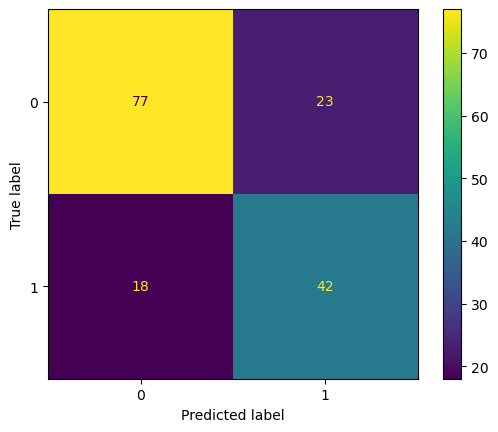

In [27]:
y_pred = dt_model.predict(x_test)

plot_confusion_matrix(dt_model,x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)

clf_r = classification_report(y_test, y_pred)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)


In [28]:
dt_model = DecisionTreeClassifier(random_state=11)

hyperparameter = {"criterion":['gini', 'entropy'], 
                 "max_depth": np.arange(3,8),
                 "min_samples_split": np.arange(2,20),
                 "min_samples_leaf": np.arange(2,15)}  
gscv_dt_clf = GridSearchCV(dt_model, hyperparameter, cv=5,n_jobs=-1)
gscv_dt_clf.fit(x_train, y_train)

model_details.append("std_scaler_Decision_Tree With Hyperparameter tuning")


accuracy--> 0.771875
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.90      0.71      0.80       400
           1       0.65      0.87      0.74       240

    accuracy                           0.77       640
   macro avg       0.77      0.79      0.77       640
weighted avg       0.81      0.77      0.78       640

*****************************************************************


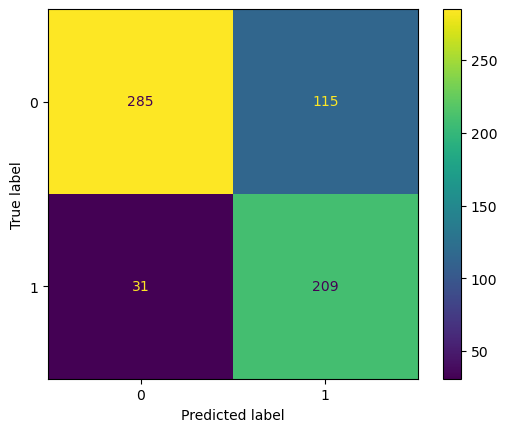

In [29]:
y_pred = gscv_dt_clf.predict(x_train)

plot_confusion_matrix(gscv_dt_clf,x_train,y_train)

accuracy = accuracy_score(y_train, y_pred)

clf_r = classification_report(y_train, y_pred)

print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)


accuracy--> 0.7375
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.86      0.69      0.77       100
           1       0.61      0.82      0.70        60

    accuracy                           0.74       160
   macro avg       0.74      0.75      0.73       160
weighted avg       0.77      0.74      0.74       160

*****************************************************************


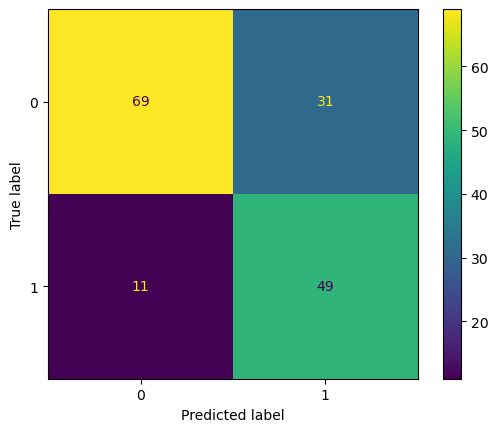

In [30]:
y_pred = gscv_dt_clf.predict(x_test)

plot_confusion_matrix(gscv_dt_clf,x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)

clf_r = classification_report(y_test, y_pred)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)

In [31]:
rf_model = RandomForestClassifier( random_state = 45)
rf_model.fit(x_train , y_train)
model_details.append("std_scaler_RandomForest_model")

accuracy--> 1.0
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       240

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640

*****************************************************************


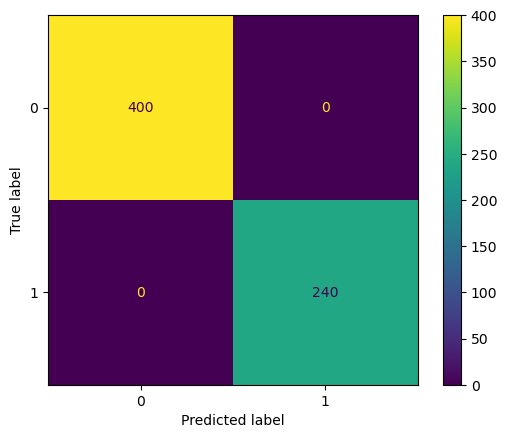

In [32]:
y_pred = rf_model.predict(x_train)

plot_confusion_matrix(rf_model,x_train,y_train)

accuracy = accuracy_score(y_train, y_pred)

clf_r = classification_report(y_train, y_pred)

print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)


accuracy--> 0.79375
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       100
           1       0.74      0.70      0.72        60

    accuracy                           0.79       160
   macro avg       0.78      0.77      0.78       160
weighted avg       0.79      0.79      0.79       160

*****************************************************************


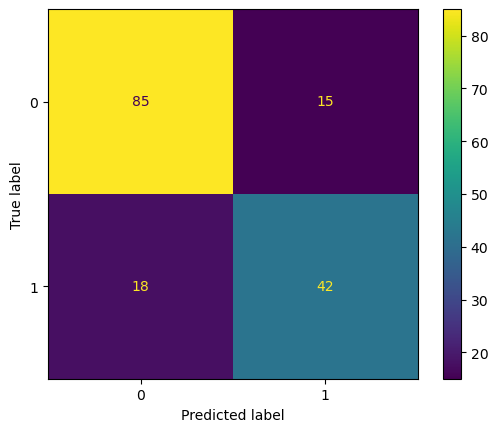

In [33]:
y_pred = rf_model.predict(x_test)

plot_confusion_matrix(rf_model,x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)

clf_r = classification_report(y_test, y_pred)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)

In [34]:
rf_model = RandomForestClassifier(random_state=10)

param_grid = {
                "n_estimators": np.arange(10,200),
                "criterion" : ['gini', 'entropy'],
                "max_depth" : np.arange(3,8),
                "min_samples_split" : np.arange(4,20),
                "min_samples_leaf": np.arange(3,10),
                "max_features" : ['sqrt', 'log2'],
                "oob_score" : [True]}

gscv_rf_model = RandomizedSearchCV(rf_model, param_grid, cv = 5)
gscv_rf_model.fit(x_train, y_train)

model_details.append("std_scaler_Random _Forest With Hyperparameter tuning")


accuracy--> 0.8484375
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       400
           1       0.84      0.74      0.78       240

    accuracy                           0.85       640
   macro avg       0.85      0.83      0.83       640
weighted avg       0.85      0.85      0.85       640

*****************************************************************


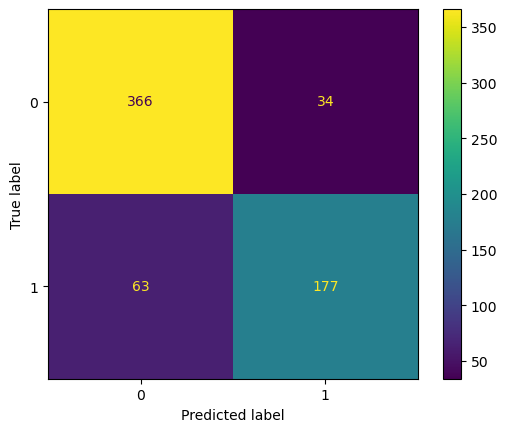

In [35]:
y_pred = gscv_rf_model.predict(x_train)

plot_confusion_matrix(gscv_rf_model,x_train,y_train)

accuracy = accuracy_score(y_train, y_pred)

clf_r = classification_report(y_train, y_pred)

print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)


accuracy--> 0.76875
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.72      0.63      0.67        60

    accuracy                           0.77       160
   macro avg       0.76      0.74      0.75       160
weighted avg       0.77      0.77      0.77       160

*****************************************************************


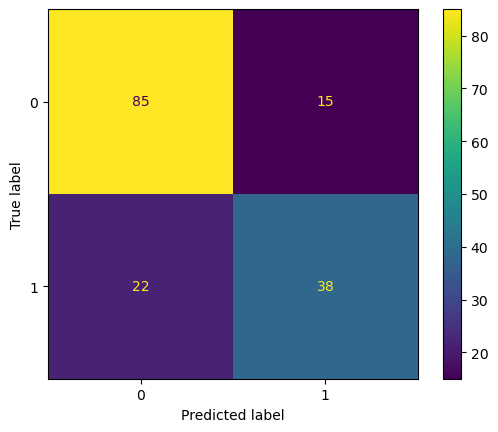

In [36]:
y_pred = gscv_rf_model.predict(x_test)

plot_confusion_matrix(gscv_rf_model,x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)

clf_r = classification_report(y_test, y_pred)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)

In [37]:
svm_model = SVC()
svm_model.fit(x_train , y_train)
model_details.append("std_scaler_svm_model")

accuracy--> 0.8296875
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       400
           1       0.83      0.69      0.75       240

    accuracy                           0.83       640
   macro avg       0.83      0.80      0.81       640
weighted avg       0.83      0.83      0.83       640

*****************************************************************


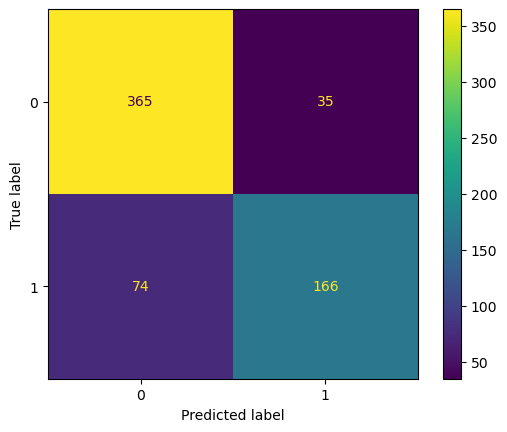

In [38]:
y_pred = svm_model.predict(x_train)

plot_confusion_matrix(svm_model,x_train,y_train)

accuracy = accuracy_score(y_train, y_pred)

clf_r = classification_report(y_train, y_pred)

print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)


accuracy--> 0.7375
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.69      0.55      0.61        60

    accuracy                           0.74       160
   macro avg       0.72      0.70      0.71       160
weighted avg       0.73      0.74      0.73       160

*****************************************************************


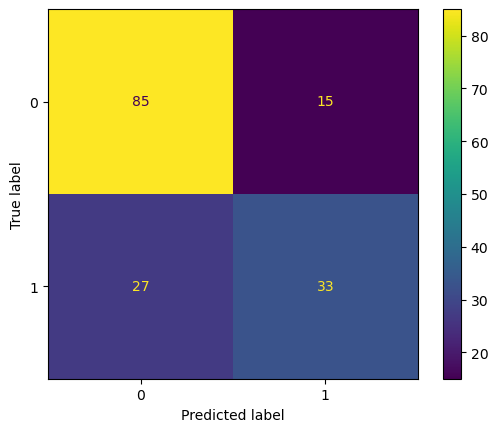

In [39]:
y_pred = svm_model.predict(x_test)

plot_confusion_matrix(svm_model,x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)

clf_r = classification_report(y_test, y_pred)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)

In [40]:
svm_clf = SVC()

param_grid = {"C": np.arange(1,1000), "kernel":['linear', 'poly', 'rbf', 'sigmoid']}  # bydefault kernel = rbf

rscv_svm = RandomizedSearchCV(svm_clf, param_grid, cv = 5, n_jobs=-1)
rscv_svm.fit(x_train, y_train)
model_details.append("std_scaler_SVM with hyperparameter tuning")

accuracy--> 0.7765625
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       400
           1       0.75      0.61      0.67       240

    accuracy                           0.78       640
   macro avg       0.77      0.74      0.75       640
weighted avg       0.77      0.78      0.77       640

*****************************************************************


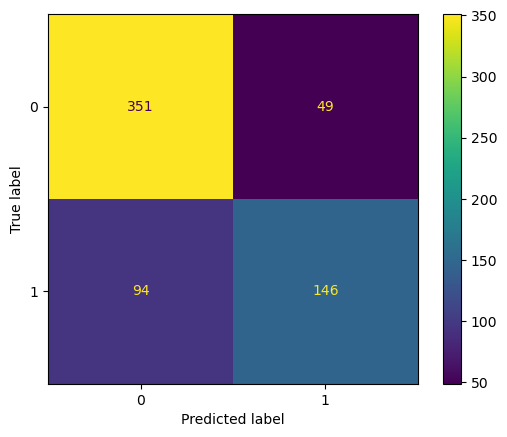

In [41]:
y_pred = rscv_svm.predict(x_train)

plot_confusion_matrix(rscv_svm,x_train,y_train)

accuracy = accuracy_score(y_train, y_pred)

clf_r = classification_report(y_train, y_pred)

print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)


accuracy--> 0.7375
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.69      0.55      0.61        60

    accuracy                           0.74       160
   macro avg       0.72      0.70      0.71       160
weighted avg       0.73      0.74      0.73       160

*****************************************************************


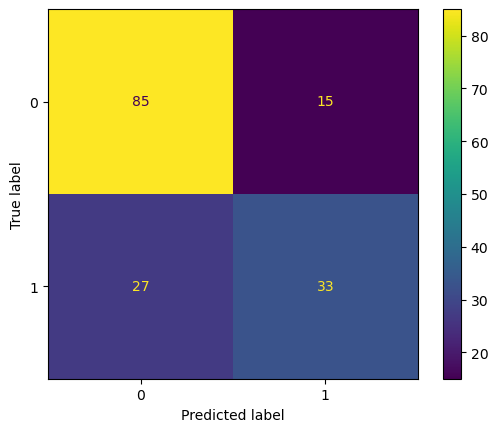

In [42]:
y_pred = rscv_svm.predict(x_test)

plot_confusion_matrix(rscv_svm,x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)

clf_r = classification_report(y_test, y_pred)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)

In [43]:
normal_scalar = MinMaxScaler()

array = normal_scalar.fit_transform(x_sample)

x = pd.DataFrame(array, columns = x_sample.columns)
y = y_sample

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11,stratify=y)

In [45]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train , y_train)
model_details.append("normal_scaler logistic_model")

accuracy--> 0.7578125
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.89      0.76      0.82       465
           1       0.54      0.74      0.63       175

    accuracy                           0.76       640
   macro avg       0.71      0.75      0.72       640
weighted avg       0.79      0.76      0.77       640

*****************************************************************


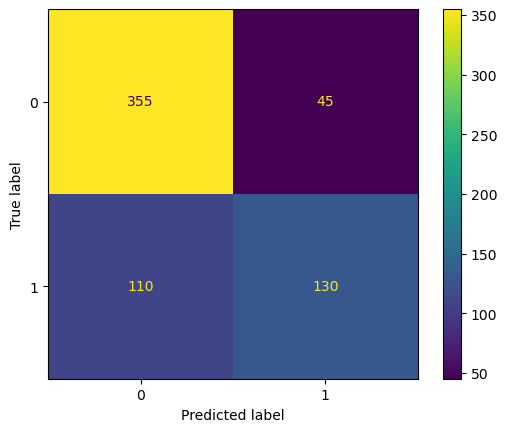

In [46]:
y_pred = logistic_model.predict(x_train)

accuracy = accuracy_score(y_pred , y_train)

plot_confusion_matrix(logistic_model,x_train , y_train)

clf_r = classification_report(y_pred , y_train)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)

accuracy--> 0.7375
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.88      0.75      0.81       118
           1       0.50      0.71      0.59        42

    accuracy                           0.74       160
   macro avg       0.69      0.73      0.70       160
weighted avg       0.78      0.74      0.75       160

*****************************************************************


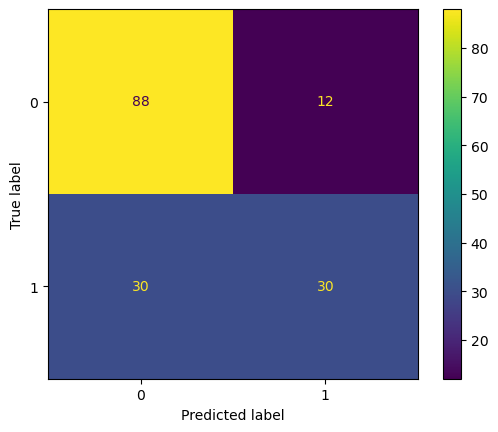

In [47]:
y_pred = logistic_model.predict(x_test)

accuracy = accuracy_score(y_pred , y_test)

plot_confusion_matrix(logistic_model,x_test , y_test)

clf_r = classification_report(y_pred , y_test)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)

In [48]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
model_details.append("normal_scaler_knn_model")

accuracy--> 0.8296875
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       400
           1       0.79      0.75      0.77       240

    accuracy                           0.83       640
   macro avg       0.82      0.81      0.82       640
weighted avg       0.83      0.83      0.83       640

*****************************************************************


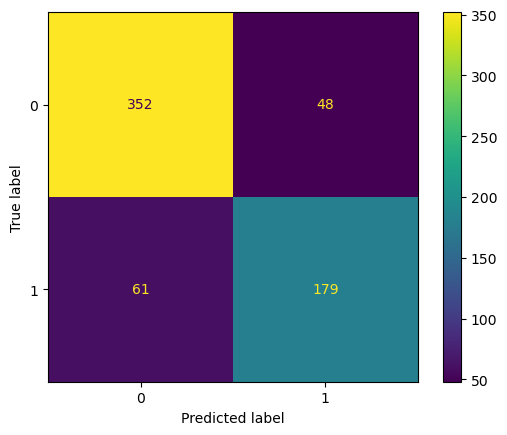

In [49]:
y_pred = knn_clf.predict(x_train)

plot_confusion_matrix(knn_clf,x_train,y_train)

accuracy = accuracy_score(y_train, y_pred)

clf_r = classification_report(y_train, y_pred)

print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)


accuracy--> 0.7375
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.78      0.80      0.79        98
           1       0.67      0.65      0.66        62

    accuracy                           0.74       160
   macro avg       0.72      0.72      0.72       160
weighted avg       0.74      0.74      0.74       160

*****************************************************************


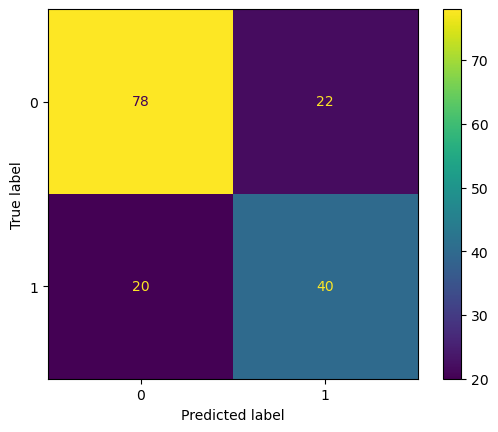

In [50]:
y_pred = knn_clf.predict(x_test)

accuracy = accuracy_score(y_pred , y_test)

plot_confusion_matrix(knn_clf,x_test , y_test)

clf_r = classification_report(y_pred , y_test)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)


In [51]:
knn_clf = KNeighborsClassifier()
param_grid = {"n_neighbors":np.arange(3,30),
             "p":[1,2]}

gscv_knn_clf = GridSearchCV(knn_clf,param_grid, cv=5)
gscv_knn_clf.fit(x_train,y_train)
knn_clf = gscv_knn_clf.best_estimator_
knn_clf.fit(x_train,y_train)
model_details.append("normal_scaler_hyperparameter_tunning_noramal_model")

accuracy--> 0.81875
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       400
           1       0.77      0.73      0.75       240

    accuracy                           0.82       640
   macro avg       0.81      0.80      0.80       640
weighted avg       0.82      0.82      0.82       640

*****************************************************************


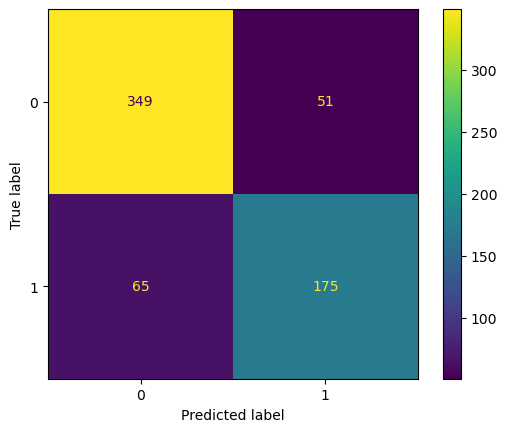

In [52]:
y_pred = knn_clf.predict(x_train)

plot_confusion_matrix(knn_clf,x_train,y_train)

accuracy = accuracy_score(y_train, y_pred)

clf_r = classification_report(y_train, y_pred)

print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)


accuracy--> 0.775
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.71      0.68      0.69        60

    accuracy                           0.78       160
   macro avg       0.76      0.76      0.76       160
weighted avg       0.77      0.78      0.77       160

*****************************************************************


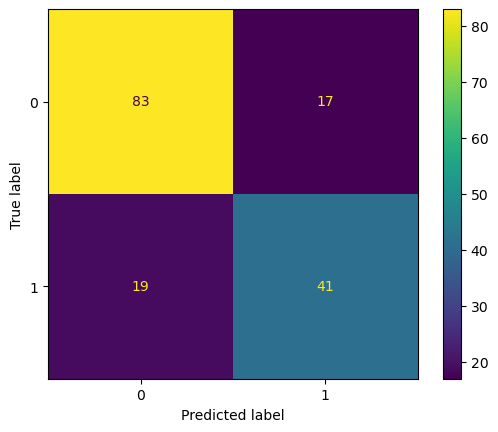

In [53]:
y_pred = knn_clf.predict(x_test)

plot_confusion_matrix(knn_clf,x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)

clf_r = classification_report(y_test, y_pred)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)


In [54]:
dt_model = DecisionTreeClassifier( random_state = 44)
dt_model.fit(x_train , y_train)
model_details.append("normal_scaler_DecisionTree_model")

accuracy--> 1.0
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       240

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640

*****************************************************************


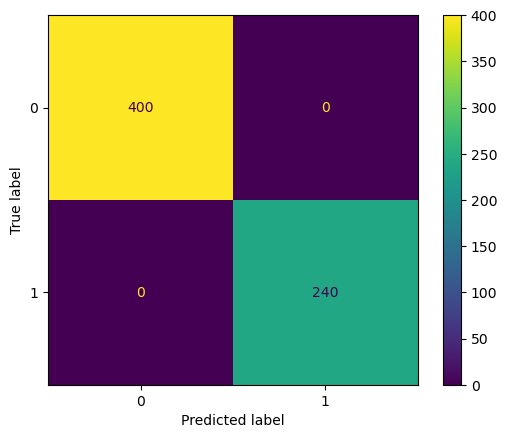

In [55]:
y_pred = dt_model.predict(x_train)

plot_confusion_matrix(dt_model,x_train,y_train)

accuracy = accuracy_score(y_train, y_pred)

clf_r = classification_report(y_train, y_pred)

print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)


accuracy--> 0.74375
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       100
           1       0.65      0.70      0.67        60

    accuracy                           0.74       160
   macro avg       0.73      0.73      0.73       160
weighted avg       0.75      0.74      0.75       160

*****************************************************************


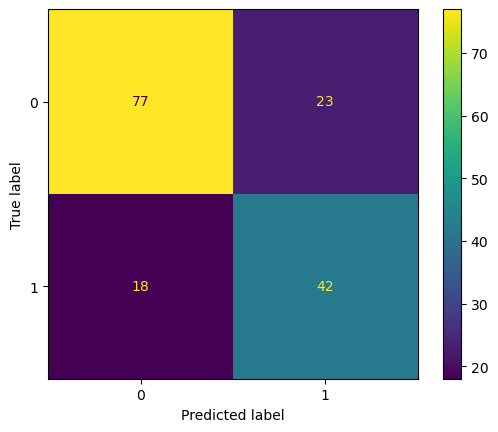

In [56]:
y_pred = dt_model.predict(x_test)

plot_confusion_matrix(dt_model,x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)

clf_r = classification_report(y_test, y_pred)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)


In [57]:
dt_model = DecisionTreeClassifier(random_state=11)

hyperparameter = {"criterion":['gini', 'entropy'], 
                 "max_depth": np.arange(3,8),
                 "min_samples_split": np.arange(2,20),
                 "min_samples_leaf": np.arange(2,15)}  
gscv_dt_clf = GridSearchCV(dt_model, hyperparameter, cv=5,n_jobs=-1)
gscv_dt_clf.fit(x_train, y_train)

model_details.append("normal_scaler_Decision_Tree With Hyperparameter tuning")


accuracy--> 0.771875
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.90      0.71      0.80       400
           1       0.65      0.87      0.74       240

    accuracy                           0.77       640
   macro avg       0.77      0.79      0.77       640
weighted avg       0.81      0.77      0.78       640

*****************************************************************


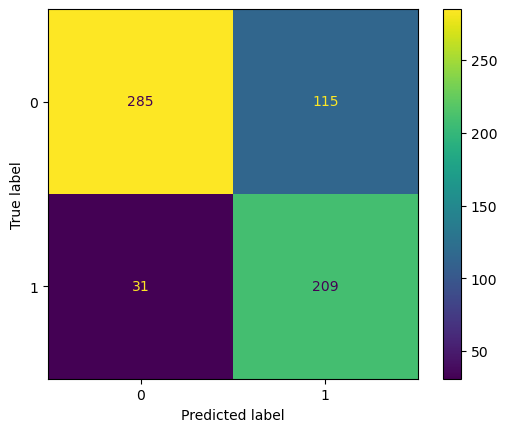

In [58]:
y_pred = gscv_dt_clf.predict(x_train)

plot_confusion_matrix(gscv_dt_clf,x_train,y_train)

accuracy = accuracy_score(y_train, y_pred)

clf_r = classification_report(y_train, y_pred)

print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)


accuracy--> 0.7375
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.86      0.69      0.77       100
           1       0.61      0.82      0.70        60

    accuracy                           0.74       160
   macro avg       0.74      0.75      0.73       160
weighted avg       0.77      0.74      0.74       160

*****************************************************************


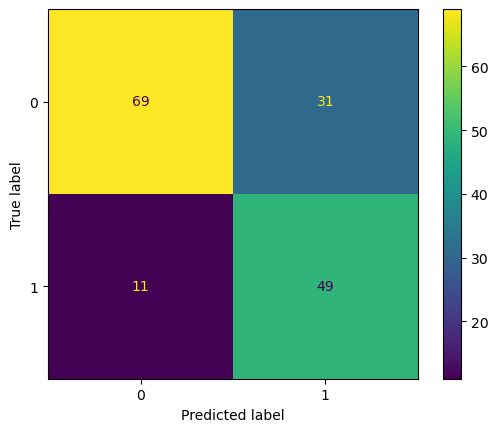

In [59]:
y_pred = gscv_dt_clf.predict(x_test)

plot_confusion_matrix(gscv_dt_clf,x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)

clf_r = classification_report(y_test, y_pred)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)


In [60]:
rf_model = RandomForestClassifier( random_state = 45)
rf_model.fit(x_train , y_train)
model_details.append("normal_scaler_RandomForest_model")

accuracy--> 1.0
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       240

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640

*****************************************************************


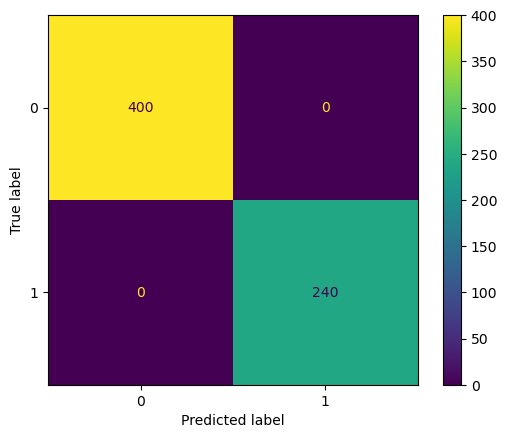

In [61]:
y_pred = rf_model.predict(x_train)

plot_confusion_matrix(rf_model,x_train,y_train)

accuracy = accuracy_score(y_train, y_pred)

clf_r = classification_report(y_train, y_pred)

print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)


accuracy--> 0.7875
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       100
           1       0.72      0.70      0.71        60

    accuracy                           0.79       160
   macro avg       0.77      0.77      0.77       160
weighted avg       0.79      0.79      0.79       160

*****************************************************************


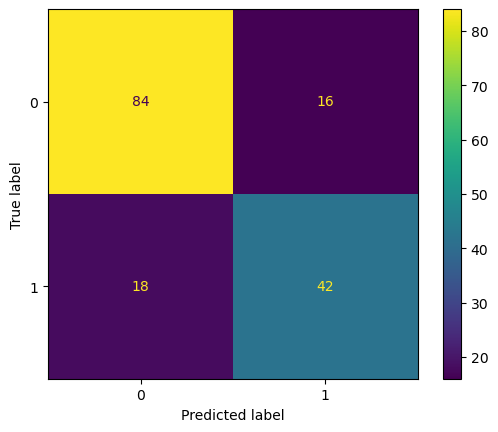

In [62]:
y_pred = rf_model.predict(x_test)

plot_confusion_matrix(rf_model,x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)

clf_r = classification_report(y_test, y_pred)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)

In [63]:
rf_model = RandomForestClassifier(random_state=10)

param_grid = {
                "n_estimators": np.arange(10,200),
                "criterion" : ['gini', 'entropy'],
                "max_depth" : np.arange(3,8),
                "min_samples_split" : np.arange(4,20),
                "min_samples_leaf": np.arange(3,10),
                "max_features" : ['sqrt', 'log2'],
                "oob_score" : [True]}

gscv_rf_model = RandomizedSearchCV(rf_model, param_grid, cv = 5)
gscv_rf_model.fit(x_train, y_train)

model_details.append("normal_scaler_Random _Forest With Hyperparameter tuning")


accuracy--> 0.8921875
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       400
           1       0.88      0.82      0.85       240

    accuracy                           0.89       640
   macro avg       0.89      0.88      0.88       640
weighted avg       0.89      0.89      0.89       640

*****************************************************************


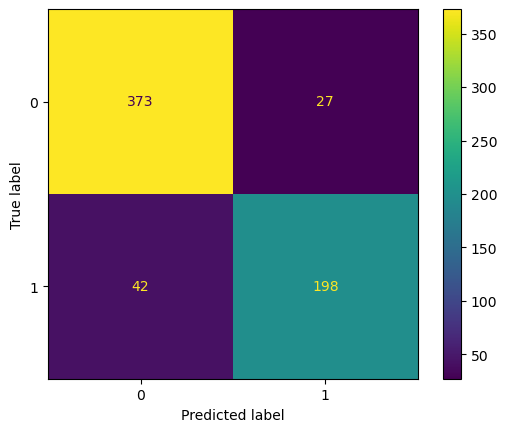

In [64]:
y_pred = gscv_rf_model.predict(x_train)

plot_confusion_matrix(gscv_rf_model,x_train,y_train)

accuracy = accuracy_score(y_train, y_pred)

clf_r = classification_report(y_train, y_pred)

print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)


accuracy--> 0.7625
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.71      0.62      0.66        60

    accuracy                           0.76       160
   macro avg       0.75      0.73      0.74       160
weighted avg       0.76      0.76      0.76       160

*****************************************************************


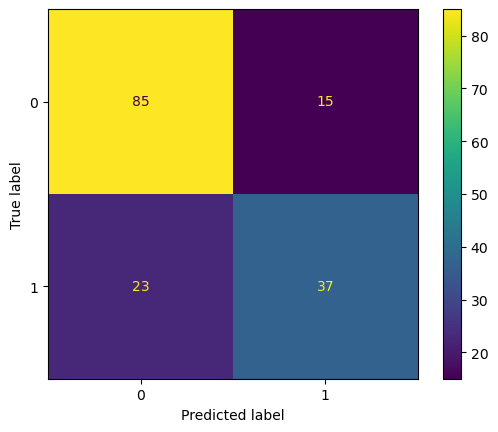

In [65]:
y_pred = gscv_rf_model.predict(x_test)

plot_confusion_matrix(gscv_rf_model,x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)

clf_r = classification_report(y_test, y_pred)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)

In [66]:
svm_model = SVC()
svm_model.fit(x_train , y_train)
model_details.append("normal_scaler_svm_model")

accuracy--> 0.796875
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       400
           1       0.77      0.66      0.71       240

    accuracy                           0.80       640
   macro avg       0.79      0.77      0.78       640
weighted avg       0.79      0.80      0.79       640

*****************************************************************


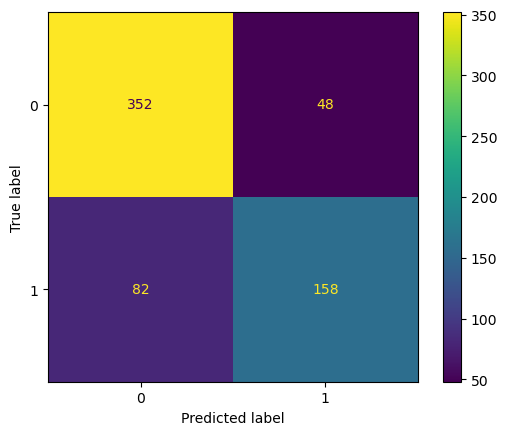

In [67]:
y_pred = svm_model.predict(x_train)

plot_confusion_matrix(svm_model,x_train,y_train)

accuracy = accuracy_score(y_train, y_pred)

clf_r = classification_report(y_train, y_pred)

print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)


accuracy--> 0.74375
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       100
           1       0.70      0.55      0.62        60

    accuracy                           0.74       160
   macro avg       0.73      0.71      0.71       160
weighted avg       0.74      0.74      0.74       160

*****************************************************************


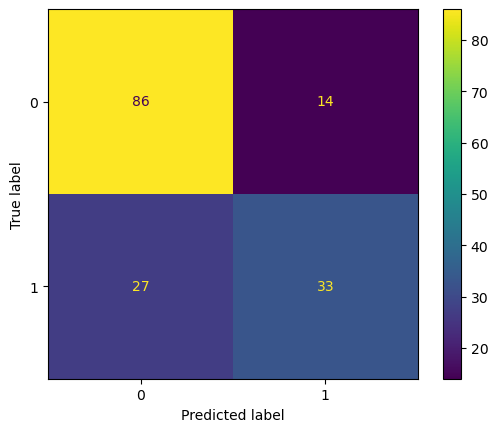

In [68]:
y_pred = svm_model.predict(x_test)

plot_confusion_matrix(svm_model,x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)

clf_r = classification_report(y_test, y_pred)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)

In [69]:
svm_clf = SVC()

param_grid = {"C": np.arange(1,1000), "kernel":['linear', 'poly', 'rbf', 'sigmoid']}  # bydefault kernel = rbf

rscv_svm = RandomizedSearchCV(svm_clf, param_grid, cv = 5, n_jobs=-1)
rscv_svm.fit(x_train, y_train)
model_details.append("normal scaler SVM with hyperparameter tuning")

accuracy--> 0.7765625
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       400
           1       0.75      0.61      0.67       240

    accuracy                           0.78       640
   macro avg       0.77      0.74      0.75       640
weighted avg       0.77      0.78      0.77       640

*****************************************************************


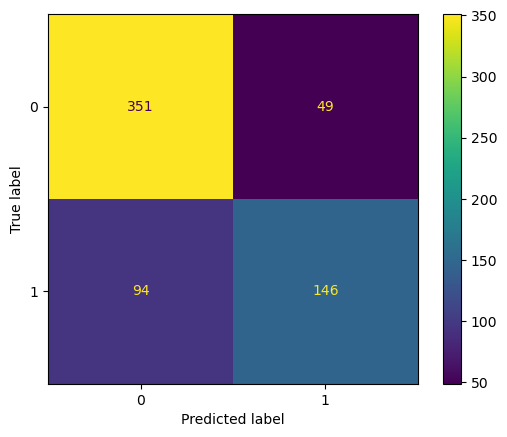

In [70]:
y_pred = rscv_svm.predict(x_train)

plot_confusion_matrix(rscv_svm,x_train,y_train)

accuracy = accuracy_score(y_train, y_pred)

clf_r = classification_report(y_train, y_pred)

print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)

training_accuracy.append(accuracy)


accuracy--> 0.7375
*****************************************************************
classification_report-->
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.69      0.55      0.61        60

    accuracy                           0.74       160
   macro avg       0.72      0.70      0.71       160
weighted avg       0.73      0.74      0.73       160

*****************************************************************


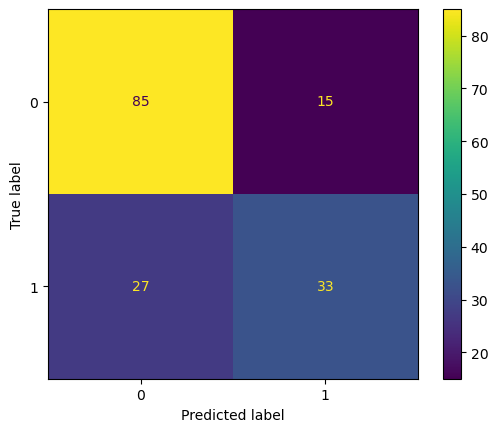

In [71]:
y_pred = rscv_svm.predict(x_test)

plot_confusion_matrix(rscv_svm,x_test,y_test)

accuracy = accuracy_score(y_test, y_pred)

clf_r = classification_report(y_test, y_pred)


print("accuracy-->",accuracy)
print("*"*65)
print("classification_report-->\n",clf_r)
print("*"*65)


testing_accuracy.append(accuracy)

In [72]:
df1 = pd.DataFrame({"models":model_details,
                  "training_accuracy":training_accuracy,
                  "testing_accuracy":testing_accuracy})

df1

,models,training_accuracy,testing_accuracy
0,std_scaler_logistic_model,0.778125,0.73750
1,std_scaler_knn_model,0.834375,0.78750
2,std_scaler_hyperparameter_tunning_noramal_model,0.817187,0.76250
3,std_scaler_DecisionTree,1.000000,0.74375
4,std_scaler_Decision_Tree With Hyperparameter t...,0.771875,0.73750
5,std_scaler_RandomForest_model,1.000000,0.79375
6,std_scaler_Random _Forest With Hyperparameter ...,0.848437,0.76875
7,std_scaler_svm_model,0.829688,0.73750
8,std_scaler_SVM with hyperparameter tuning,0.776563,0.73750
9,normal_scaler logistic_model,0.757812,0.73750


In [73]:
x.head(1).T

,0
Glucose,0.743719
BloodPressure,0.409836
SkinThickness,0.353535
Insulin,0.000000
BMI,0.500745
DiabetesPedigreeFunction,0.234415
Age,0.483333


In [74]:
Glucose = 148.000
BloodPressure = 50.000
SkinThickness = 20.000
Insulin = 0.000
BMI = 33.600
DiabetesPedigreeFunction = 0.627
Age = 40.000


In [75]:
test_array = np.zeros(len(x.columns))

In [76]:
test_array [0] = Glucose
test_array [1] = BloodPressure
test_array [2] = SkinThickness
test_array [3] = Insulin
test_array [4] = BMI
test_array [5] = DiabetesPedigreeFunction
test_array [6] = Age

test_array

array([148.   ,  50.   ,  20.   ,   0.   ,  33.6  ,   0.627,  40.   ])

In [77]:
prediction = knn_clf.predict([test_array])

if prediction==1:
    print("Yes,You are diabetic patient")
else:
    print("You are diabetic patient")

Yes,You are diabetic patient


In [78]:
import pickle

In [84]:
with open("model.pkl","wb") as f:
    pickle.dump(gscv_dt_clf,f)

In [85]:
import json

In [86]:
columns_names = x.columns
columns_names

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [87]:
json_data ={"columns":list(columns_names)}
json_data

{'columns': ['Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age']}

In [88]:
with open("json_file.json","w") as f:
    json.dump(json_data,f)